In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import json

In [2]:
results = pd.read_csv("resultado_junto.csv")

bresults = results[results["binarized"] == 1]
nbresults = results[results["binarized"] == 0]

In [3]:
positions = {(0, 0): "AZUL4.SA",
             (1, 0): "PRIO3.SA",
             (0, 1): "TSLA",
             (1, 1): "VIVA3.SA"}

In [18]:
def r_squared(poly1d_fn, x, y):
    # Calculando o R²
    y_pred = poly1d_fn(x)  # Valores previstos pela regressão
    ss_res = np.sum((y - y_pred) ** 2)  # Soma dos quadrados dos resíduos
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Soma dos quadrados totais
    r_squared = 1 - (ss_res / ss_tot)  # Cálculo do R²

    return r_squared


def linear_regression(x, y):
    coef = np.polyfit(x, y, 1)  # Coeficientes da regressão linear
    poly1d_fn = np.poly1d(coef)

    return poly1d_fn


def plot_graph(data_x, data_y, xmin, xmax, ymin, ymax, axes, row, column, graph, title, label = None, regression = False):
    if graph == "bar":
        axes[row, column].bar(data_x["data"], data_y["data"], label = label)
    elif graph == "scatter":
        axes[row, column].scatter(data_x["data"], data_y["data"], label = label)
    else:
        axes[row, column].plot(data_x["data"], data_y["data"], label = label)
        
    if regression:
        poly1d_fn = linear_regression(data_x["data"], data_y["data"])
        r2 = round(r_squared(poly1d_fn, data_x["data"], data_y["data"]), 2)
        axes[row, column].plot(data_x["data"], poly1d_fn(data_x["data"]), color='red', label=r2)
        axes[row, column].legend()

    axes[row, column].set_title(title)
    axes[row, column].set_xlim(xmin, xmax)
    axes[row, column].set_ylim(ymin, ymax)


def plot_graphs(data, x, y, graph, both = False, regression = False):
    fig, axes = plt.subplots(2, 2)
    axes.flatten()

    data_x = pd.DataFrame()
    data_y = pd.DataFrame()

    data_x["Stock"] = data["Stock"]
    data_y["Stock"] = data["Stock"]

    data_x["binarized"] = data["binarized"]
    data_y["binarized"] = data["binarized"]

    if "/" in x:
        trade, stat = x.split("/")
        data_x["data"] = data["Total Dict"].apply(lambda x: ast.literal_eval(x))
        data_x["data"] = data_x["data"].apply(lambda x: x[trade][stat])
    else:
        data_x["data"] = data[x]

    if "/" in y:
        trade, stat = y.split("/")
        data_y["data"] = data["Total Dict"].apply(lambda x: ast.literal_eval(x))
        data_y["data"] = data_y["data"].apply(lambda x: x[trade][stat])
    else:
        data_y["data"] = data[y]

    xmin, xmax = np.min(data_x["data"]), np.max(data_x["data"])
    ymin, ymax = np.min(data_y["data"]), np.max(data_y["data"])
    xmin, xmax = (1 - np.sign(xmin) * 0.4)*xmin, 1.05*xmax
    ymin, ymax = (1 - np.sign(ymin) * 0.4)*ymin, 1.05*ymax

    for position, title in positions.items():
        if both:
            plot_graph(data_x[(data_x["Stock"] == title) & (data_x["binarized"] == 0)], 
                       data_y[(data_y["Stock"] == title) & (data_y["binarized"] == 0)], 
                       xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, label = "NB", regression = regression)
            plot_graph(data_x[(data_x["Stock"] == title) & (data_x["binarized"] == 1)], 
                       data_y[(data_y["Stock"] == title) & (data_y["binarized"] == 1)], 
                       xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, label = "B", regression = regression)
            axes[position[0], position[1]].legend()
        else:
            plot_graph(data_x[data_x["Stock"] == title], data_y[data_y["Stock"] == title], xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, regression = regression)

    axes[0, 0].set_ylabel(y)
    axes[1, 0].set_ylabel(y)
    axes[1, 0].set_xlabel(x)
    axes[1, 1].set_xlabel(x)

    fig.suptitle(f"{x} x {y}")

    plt.tight_layout()
    plt.show()

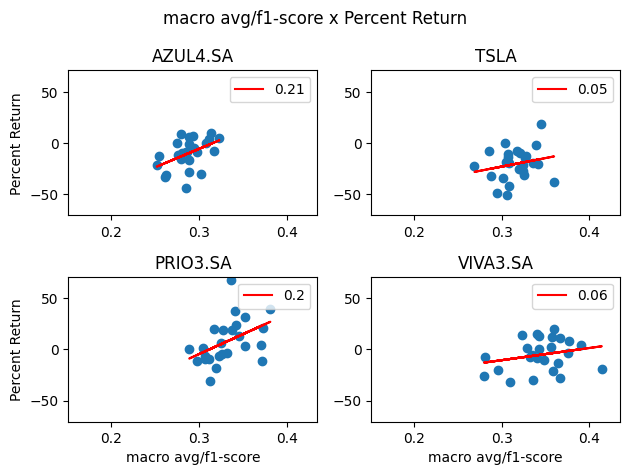

In [32]:
plot_graphs(data = bresults, x = "macro avg/f1-score", y = "Percent Return", graph = "scatter", both = False, regression = True)